In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

plt.rcParams['figure.figsize'] = [80, 10]

% matplotlib inline

UsageError: Line magic function `%` not found.


In [23]:
ABSOLUTE_PATH = '.'
DATA_FOLDER = ABSOLUTE_PATH + f'/../../data/g1-piek/scenario1/'
INPUT_FOLDER = DATA_FOLDER + f'automatic_evaluations/'
OUTPUT_FOLDER = DATA_FOLDER + f'automatic_evaluations/'

STATS_FILES = [
    '0_nobrain.csv',
    # '2021-12-07-16_26_14_turns83_thomas.csv',
    # '2021-12-07-16-26-14_truns83_imme.csv',
    # '2021-12-07-16-26-14_turns83_fina.csv'
]

file = STATS_FILES[0]

In [24]:
df = pd.read_csv(INPUT_FOLDER + file, header=0)
df = df.set_index('Turn')

In [25]:
print(f'{len(df)} turns')
df.head()

83 turns


,Speaker,Cue,Context,rdf_file,Response,MLM response,System llh,MLM llh,USR DLcontext,USR DLfact,...,Total classes,Total nodes,Total edges,Average degree,Average degree centrality,Average closeness,Average degree connectivity,Average assortativity,Average node connectivity,Total properties
Turn,,,,,,,,,,,,,,,,,,,,,
0,Leolani,NaN,NaN,brain_log_2021-12-07-16-26-24.trig,What's up? What is your name? Stranger?,what up what is your favorite _,0.290093,0.562575,0.616137,0.801052,...,294.0,2870.0,7906.0,5.509408,0.001920,0.001721,0.859677,-0.117465,0.0,267.0
1,Thomas,What's up? What is your name? Stranger?,What's up? What is your name? Stranger?,NaN,Thomas,?,0.000000,0.100155,0.910139,0.774431,...,294.0,2870.0,7906.0,5.509408,0.001920,0.001721,0.859677,-0.117465,0.0,267.0
2,Leolani,Thomas,What's up? What is your name? Stranger? Thomas,NaN,So your name is Thomas?,? your name ? ?,0.312401,0.694319,0.997722,0.719742,...,294.0,2870.0,7906.0,5.509408,0.001920,0.001721,0.859677,-0.117465,0.0,267.0
3,Thomas,So your name is Thomas?,What's up? What is your name? Stranger? Thoma...,brain_log_2021-12-07-16-27-12.trig,yes,?,0.000000,0.082555,0.983849,0.735612,...,294.0,2929.0,8021.0,5.476955,0.001871,0.001696,0.870033,-0.115215,0.0,267.0
4,Leolani,yes,What's up? What is your name? Stranger? Thoma...,NaN,Would you like to chat? I'll do my best to kee...,would you like to ? i try my best to ...,0.547160,0.736176,0.969341,0.739177,...,294.0,2929.0,8021.0,5.476955,0.001871,0.001696,0.870033,-0.115215,0.0,267.0


In [26]:
df.columns

Index(['Speaker', 'Cue', 'Context', 'rdf_file', 'Response', 'MLM response',
       'System llh', 'MLM llh', 'USR DLcontext', 'USR DLfact',
       'Overall Human Rating', 'Interesting', 'Engaging', 'Specific',
       'Relevant', 'Correct', 'Semantically Appropriate', 'Understandable',
       'Fluent', 'Total explicit triples', 'Total semantic statements',
       'Total sources', 'Total predicates', 'Total classes', 'Total nodes',
       'Total edges', 'Average degree', 'Average degree centrality',
       'Average closeness', 'Average degree connectivity',
       'Average assortativity', 'Average node connectivity',
       'Total properties'],
      dtype='object')

In [31]:
# # Separate information so it can be comparable
# df_conflicts = df[['cardinality conflicts', 'negation conflicts']]
# df_gaps = df[['subject gaps', 'object gaps']]
# df_novelty = df[['statement novelty']]
# df_novelties = df[['subject novelty', 'object novelty']]
# df_overlaps = df[['overlaps subject-predicate', 'overlaps on predicate-object']]
# df_trust = df['trust']

# df_interesting = 
# df_engaging
# df_specific
# df_relevant
# df_correct
# df_semappropriate
# df_understandable
# df_fluent
df_human = df[['Overall Human Rating', 'Interesting', 'Engaging', 'Specific', 'Relevant', 'Correct', 'Semantically Appropriate', 'Understandable', 'Fluent']]

df_graph = df[['Average degree centrality',
       'Average closeness', 'Average degree connectivity',
       'Average assortativity', 'Average node connectivity']]
df_graph_size = df[['Total nodes', 'Total edges']]
df_degree = df[['Average degree', ]]

df_size = df['Total explicit triples']
df_brain = df[['Total semantic statements', 'Total sources']]
df_ontology = df[['Total classes', 'Total properties']]



In [32]:

# dfs = [df_conflicts, df_gaps, df_novelty, df_novelties, df_overlaps, df_trust, df_size, df_brain, df_ontology]
dfs = [df_human, 
       df_graph_size, df_degree, df_size, df_graph,
       df_brain, df_ontology]

In [33]:
def plot_progression(df_to_plot, name):
    df_to_plot = df_to_plot.reset_index().melt('Turn', var_name='cols', value_name='vals')
    g = sns.catplot(x="Turn", y="vals", hue='cols', data=df_to_plot, kind='point')
    
    ax = plt.gca()
    plt.xticks(ax.get_xticks()[::5], rotation="045") 
    
    g.figure.savefig(OUTPUT_FOLDER +f"{name}.png", dpi=300)


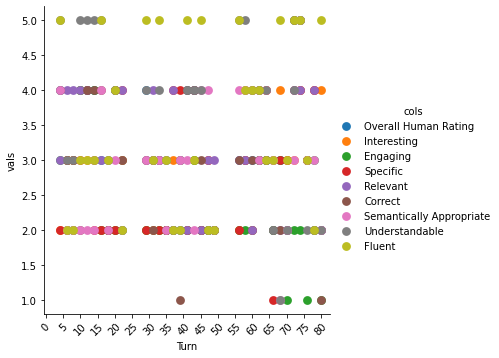

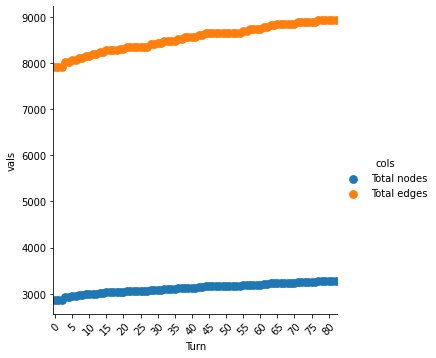

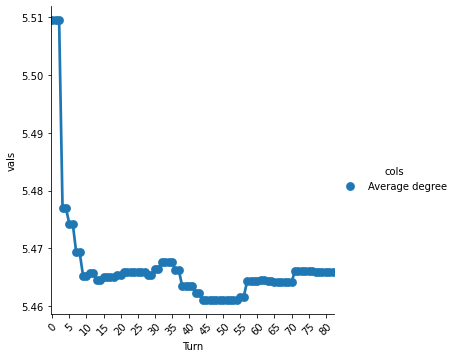

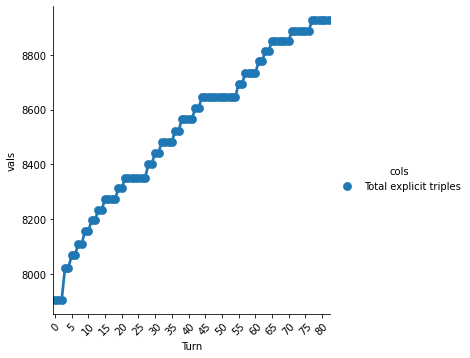

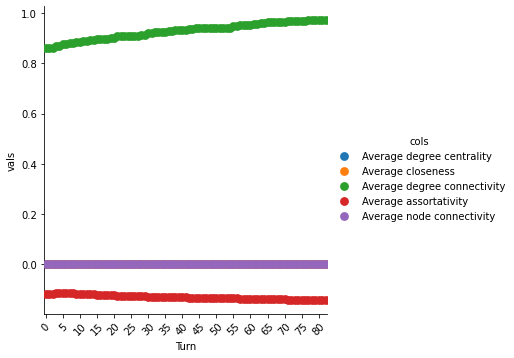

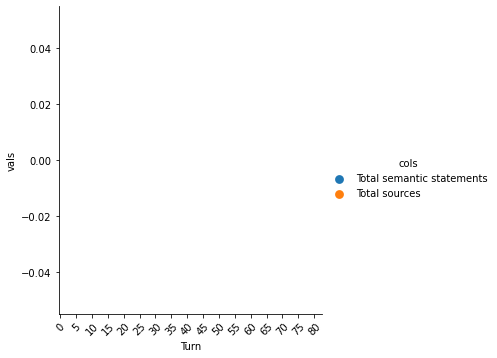

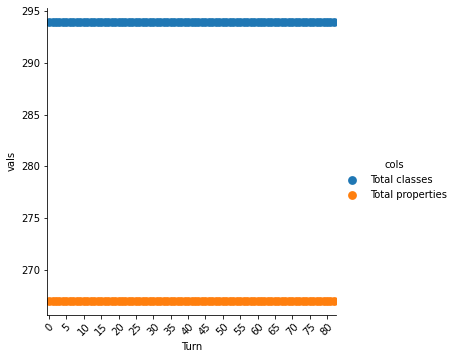

In [34]:
for idx, el in enumerate(dfs):
    plot_progression(el, idx)